In [1]:
#| label: Import-Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#| label: Scatter-Plot
np.random.seed(123)
x = 2*np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
plt.scatter(x,y)
plt.show()

In [ ]:
#| label: Linear-Algebra
# Create Intercept
X = np.hstack([np.ones((100,1)),x])
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
#| label: Scikit-Learn-Linear-Regression
#| include: false
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
# Time complexity is O(n^2), which is very slow 

In [ ]:
#| label: Gradient-Descent
#| include: false
# minimize the cost function(Loss function)
# Learning rate is small, it might take a longer time to converge, vice versa.
# When using Gradient Descent, you should ensure that all features have a similar scale
# Batch Gradient Descent: whole data set to update the step, fixed learning rate
# Stochastic Gradient Descent: random and single data to update the step Shuffile is very important
# Gradually reduce the learning rate. The steps start out large then get smaller and smaller
# Mini-Batch Gradient Descent: small random sets of instances 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(x,y.reshape(-1))

In [ ]:
from IPython.display import Markdown
from tabulate import tabulate
table = [["Normal Equation", beta_hat[0][0], beta_hat[1][0]],
         ["SVD", lin_reg.intercept_[0], lin_reg.coef_[0][0]],
         ["SGD", sgd_reg.intercept_[0], sgd_reg.coef_[0]]
         ]
Markdown(tabulate(
  table, 
  headers=["Algorithm","Intercept", "Slope"]
))

In [ ]:
#| label: Predicted-Rgression
def abline(slope, intercept, color, label):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color)
plt.scatter(x,y)
abline(beta_hat[1][0], beta_hat[0][0], color = "r-", label = "Normal Equaation")
abline(lin_reg.coef_[0][0], lin_reg.intercept_[0], color = "y-", label = "SVD")
abline(sgd_reg.coef_[0], sgd_reg.intercept_[0], color = "g-", label = "SGD")
plt.show()

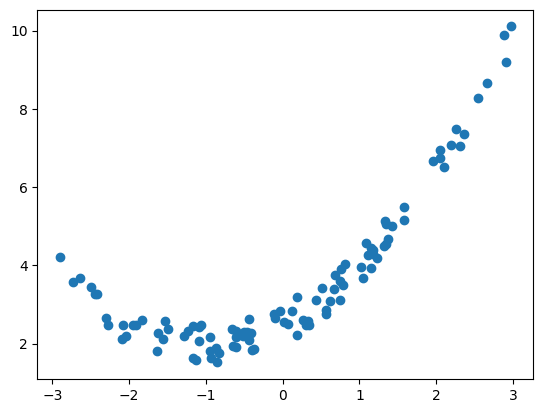

In [3]:
#| label: Polynomial-Regression
# (100,1)
np.random.seed(123)
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(100,1)

In [ ]:
#| label: Train-Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_square = poly_features.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_square, y)

In [16]:
lin_reg.predict(x_square)

array([[4.35145933],
       [2.0650162 ],
       [2.24329283],
       [2.83945204],
       [4.66169088],
       [2.14422469],
       [9.54322797],
       [4.20182666],
       [2.38344016],
       [2.06630744],
       [2.01471588],
       [4.79662263],
       [2.1962363 ],
       [3.43759043],
       [2.07849583],
       [4.92563837],
       [2.46067515],
       [2.50178462],
       [2.69312869],
       [2.69507537],
       [3.61071248],
       [6.77785472],
       [4.73149844],
       [3.36820794],
       [4.70322249],
       [2.01894628],
       [2.02402362],
       [2.23755499],
       [2.05149162],
       [3.57393681],
       [3.12610715],
       [2.17891204],
       [2.16921683],
       [2.45264175],
       [2.15275092],
       [2.0272266 ],
       [2.15441271],
       [7.63326894],
       [8.70913491],
       [2.49998703],
       [3.49986289],
       [2.92427425],
       [2.02281694],
       [2.11997012],
       [7.09794031],
       [2.15692953],
       [2.39443897],
       [9.656

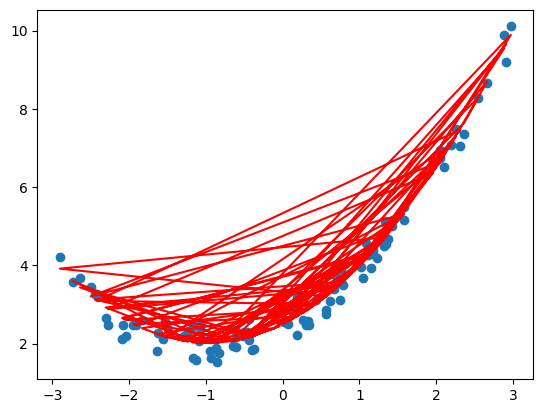

In [15]:
#| label: Prediction-Plot
plt.figure()
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x_square), color = 'red')
plt.show()